In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
obs = pd.read_csv("observations.csv")

In [203]:
obs.value_counts().head(10)

scientific_name         park_name                            observations
Poa compressa           Great Smoky Mountains National Park  80              2
Salix exigua            Yosemite National Park               186             2
Eleocharis palustris    Great Smoky Mountains National Park  62              2
Potentilla norvegica    Yosemite National Park               148             2
Spilogale putorius      Yellowstone National Park            256             2
Echinochloa crus-galli  Great Smoky Mountains National Park  62              2
Prunella vulgaris       Great Smoky Mountains National Park  75              2
Monotropa hypopithys    Great Smoky Mountains National Park  73              2
Hesperis matronalis     Bryce National Park                  124             2
Streptopelia decaocto   Yellowstone National Park            255             2
dtype: int64

In [201]:
# Find the maximum number of observations in the "observations.csv" file
max_value = obs["observations"].max()
f'The maximum number of observations of one species was {max_value}'

'The maximum number of observations of one species was 321'

In [199]:
# set index to 0 and highest value to 0
i=0
nv=0

# compare each value to the previous highest value
old_value=0

# loop through each row
for new_value in obs['observations']:

# compare values
    if new_value > nv:

# set old value to recent new value
        old_value = new_value
        nv = old_value

# print the highest creature with the highest observations
sn = obs['scientific_name'][nv]
f'The {sn} has {nv} observations.  This species had the highest number of observations'

'The Juncus uncialis has 321 observations.  The species had the highest number of observations'

In [227]:
pn = obs["park_name"].value_counts()
f'The total number of data points at each park is {pn[2]}'


'The total number of data points at each park is 5824'

In [224]:
smokey = 0
yosemite = 0
yellowstone = 0
bryce = 0
i=0

# loop through each row
for index in obs['observations']:
    if obs['park_name'][i] == 'Great Smoky Mountains National Park':
        smokey += obs['observations'][i]
    if obs['park_name'][i] == 'Yosemite National Park':
        yosemite += obs['observations'][i]
    if obs['park_name'][i] == 'Bryce National Park':
        bryce += obs['observations'][i]
    if obs['park_name'][i] == 'Yellowstone National Park':
        yellowstone += obs['observations'][i]
    i+=1
f'The total number of observations at each park at is the Great Smoky Mountains National Park, Yosemite National Park, Bryce National Park, and  Yellowstone National Park is, repectively: {smokey}, {yosemite}, {bryce}, and {yellowstone}'

'The total number of observations at each park at is the Great Smoky Mountains National Park, Yosemite National Park, Bryce National Park, and  Yellowstone National Park is, repectively: 431820, 863332, 576025, and 1443562'

|  Park | Observations |
| -------- | ---------|
| Great Smoky Mountains National Park | 431,820 |
| Yosemite National Park| 863,332 |
| Bryce National Park | 576,025 |
| Yellowstone National Park | 1,443,562 |

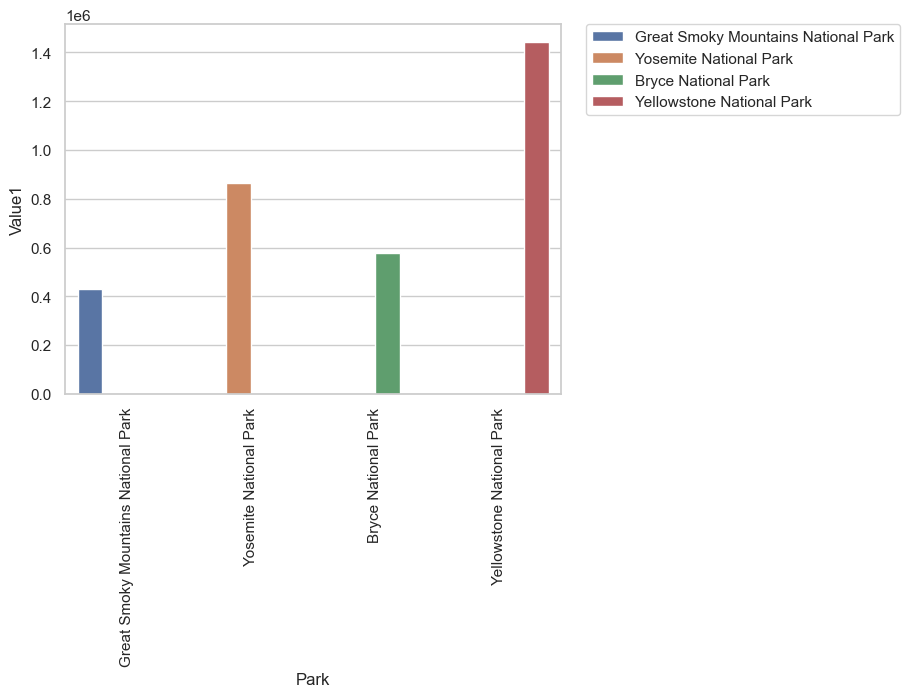

In [234]:
# Create a sample dataset
data = {
    'Park': ['Great Smoky Mountains National Park', 'Yosemite National Park', 'Bryce National Park', 'Yellowstone National Park'],
    'Value1': [431820, 863332, 576025,1443562 ],
}

df = pd.DataFrame(data)

# Create the bar plot with Seaborn
sns.set(style="whitegrid")
sns.barplot(x="Park", y="Value1", data=df, hue="Park")


# Add a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Rotate the X-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

### A glance at the data
The data includes the type of creature, its scientific and common names, and its conservation status.  It would be interesing to know what "NaN" means in terms of the conservation status.

In [245]:
sn = pd.read_csv("species_info.csv")
sn

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


### Is there a significant difference between species and their conservation status?

Yes, although we will see that there are number of scientific names in the dataframe is less than the number of rows, indicating that at least one of the scientific names is recorded more than once.

In [250]:
len(sn["common_names"])

5824

In [251]:
# Number of unique common names

unique_count_sn = sn['common_names'].nunique()
unique_count_sn

5504

In [263]:
unique_conservation_sn = sn['conservation_status'].nunique()
unique_conservation_sn

4

In [254]:
sn[['common_names', 'conservation_status']].head(10)


,common_names,conservation_status
0,Gapper's Red-Backed Vole,NaN
1,"American Bison, Bison",NaN
2,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Wapiti Or Elk,NaN
5,White-Tailed Deer,NaN
6,"Feral Hog, Wild Pig",NaN
7,Coyote,Species of Concern
8,Gray Wolf,Endangered
9,Red Wolf,Endangered


In [71]:
sorted_obs = obs.sort_values(by="observations",ascending=False)
sorted_obs

,scientific_name,observations
9,Diphyscium cumberlandianum,250
6,Spizella pusilla,228
8,Lysimachia quadrifolia,168
2,Prunus subcordata,138
5,Elymus virginicus var. virginicus,112
4,Githopsis specularioides,85
3,Abutilon theophrasti,84
1,Neovison vison,77
0,Vicia benghalensis,68
7,Elymus multisetus,39


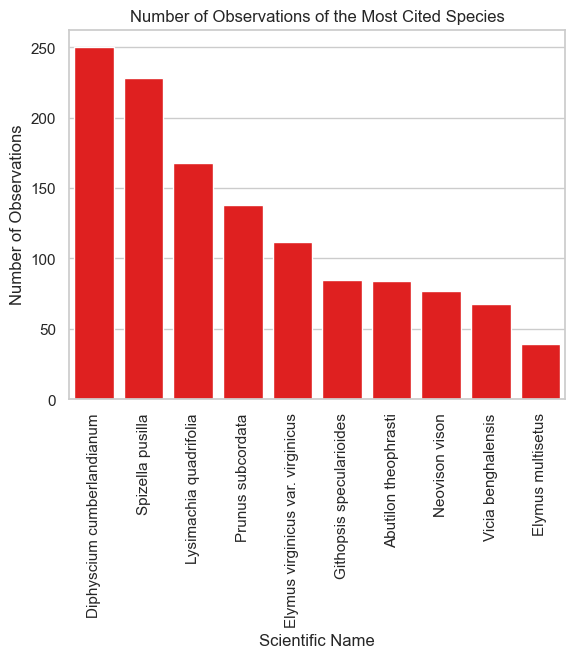

In [260]:
# Create a bar plot of the value counts
sns.barplot(x=sorted_obs.scientific_name, y=sorted_obs.observations, color="red")

# Add labels and title to the plot
plt.title("Number of Observations of the Most Cited Species")
plt.xlabel("Scientific Name")
plt.ylabel("Number of Observations")

# Rotate the X-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [23]:
species_info = pd.read_csv("species_info.csv")

In [12]:
species_info

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [55]:
species_info.value_counts("category")

category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
dtype: int64

### What category more likely to be found?

The vascular plants are much more likely to be found than any other category

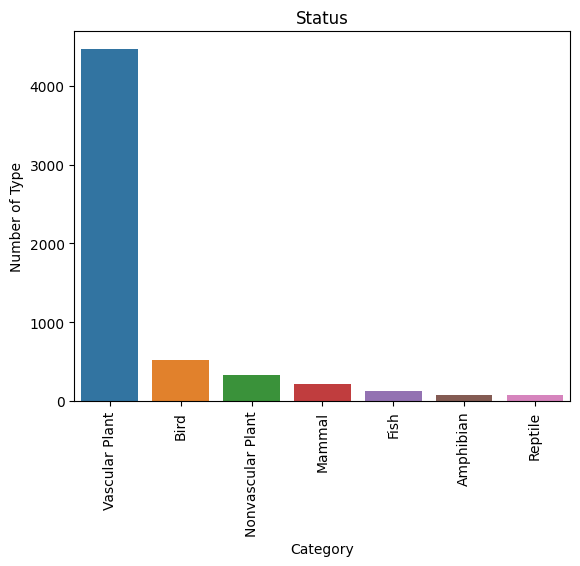

In [79]:
spc = species_info.value_counts("category")

# Create a bar plot of the value counts
sns.barplot(x=spc.index, y=spc.values)

# Add labels and title to the plot
plt.title("Status of Type")
plt.xlabel("Category")
plt.ylabel("Number of Type")

# Rotate the X-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

### Distribution of conservation status for animals?

There are approximately eight times as many "species of concern" than there are "endangered" species

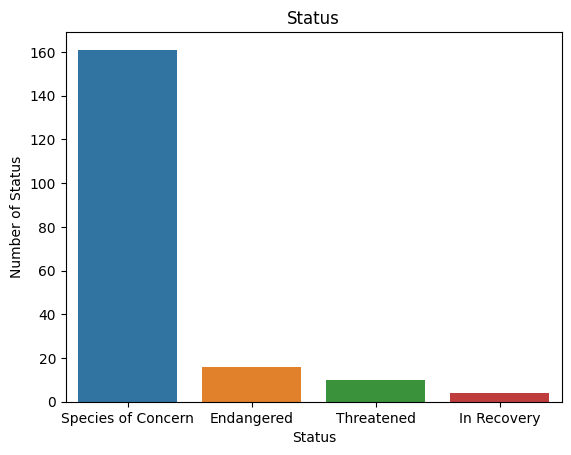

In [58]:
# Load species value counts
species_value_counts = species_info["conservation_status"].value_counts()

# Create a bar plot of the value counts
sns.barplot(x=species_value_counts.index, y=species_value_counts.values)

# Add labels and title to the plot
plt.title("Status")
plt.xlabel("Status")
plt.ylabel("Number of Status")

# Show the plot
plt.show()